# Control theory and Vicsek Model - Clustering analysis : dynamics of clusters over time, graph theory applied to clustering

## Importing modules and libraries 

In [175]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display
from collections import Counter

In [176]:
# Module imports
import models.vicsek as vicsek
import visualisation as visualisation
import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

## Example of simulation 

In [177]:
# Initialize the Vicsek model.
radius = 1
L = 25
N = 100

In [178]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1)
# Simulate the Vicsek model.
simulationData = simulator.simulate( tmax=10000)

In [179]:
df = utils.simulationDataToDataframe(simulationData)
df.to_csv('data/vicsek.csv', index=False)

In [180]:
# df_labels = utils.clusters_over_time(df, k_coef=1.5, L=L, min_samples=5)
df_labels = utils.clusters_over_time(df, func=utils.periodic_clustering_labels_pos_ang, k_coef=1.5, L=L, delta_theta = 0.5, min_samples=5)
df_labels.to_csv('data/vicsek_labels.csv', index=False)

In [181]:
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,-1,1,-1,1,-1,2,0,1,-1,...,1,1,0,-1,-1,3,4,-1,-1,2
1,0,-1,0,-1,0,-1,1,2,0,-1,...,0,0,2,-1,-1,5,3,3,-1,4
2,0,-1,0,-1,0,-1,1,2,0,-1,...,0,0,2,-1,-1,4,3,3,-1,1
3,0,-1,0,3,0,3,1,2,0,-1,...,0,0,2,-1,-1,-1,4,-1,-1,1
4,0,-1,0,2,0,2,1,5,0,-1,...,0,0,5,-1,-1,4,3,-1,-1,1


In [182]:
def lissage(signal_brut,L):
    res = np.copy(signal_brut) # duplication des valeurs
    for i in range (1,len(signal_brut)-1): # toutes les valeurs sauf la première et la dernière

        L_g = min(i,L) # nombre de valeurs disponibles à gauche
        L_d = min(len(signal_brut)-i-1,L) # nombre de valeurs disponibles à droite
        Li=min(L_g,L_d)

        res[i]=np.sum(signal_brut[i-Li:i+Li+1])/(2*Li+1)
    return res

In [191]:
data = df_labels.to_numpy()
mask_noise = data[0,:] == -1

(100,)

In [196]:

cluster_count = []
cluster_sizes = []
smoothing = 250
for i in range(len(data)):
    mask_noise = data[i,:] == -1
    cluster_count.append(len(set(data[i])) - 1)
    cnt = Counter(data[i])
    if len(cnt) > 1:
        most_common = cnt.most_common(2)
        if most_common[0][0] == -1: # if noise is the most common cluster
            cluster_sizes.append(most_common[1][1])
        else : # biggest cluster is not noise
            cluster_sizes.append(most_common[0][1])
    else : 
        most_common = cnt.most_common()
        if most_common[0][0] == -1:
            cluster_sizes.append(0)
        else:
            cluster_sizes.append(most_common[0][1]) 
        # if len(cnt) > 1:
        
    # else:

    cluster_sizes.append(Counter(data[i]).most_common()[0][1])
cluster_count = np.array(cluster_count)
cluster_sizes = np.array(cluster_sizes)
cluster_count_lisse = lissage(cluster_count, smoothing)
cluster_sizes_lisse = lissage(cluster_sizes, smoothing)

mean_size_over_time = [np.mean(cluster_sizes[0:i]) for i in range(len(cluster_sizes))]
mean_count_over_time = [np.mean(cluster_count[0:i]) for i in range(len(cluster_count))]


c:\Users\nicos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nicos\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


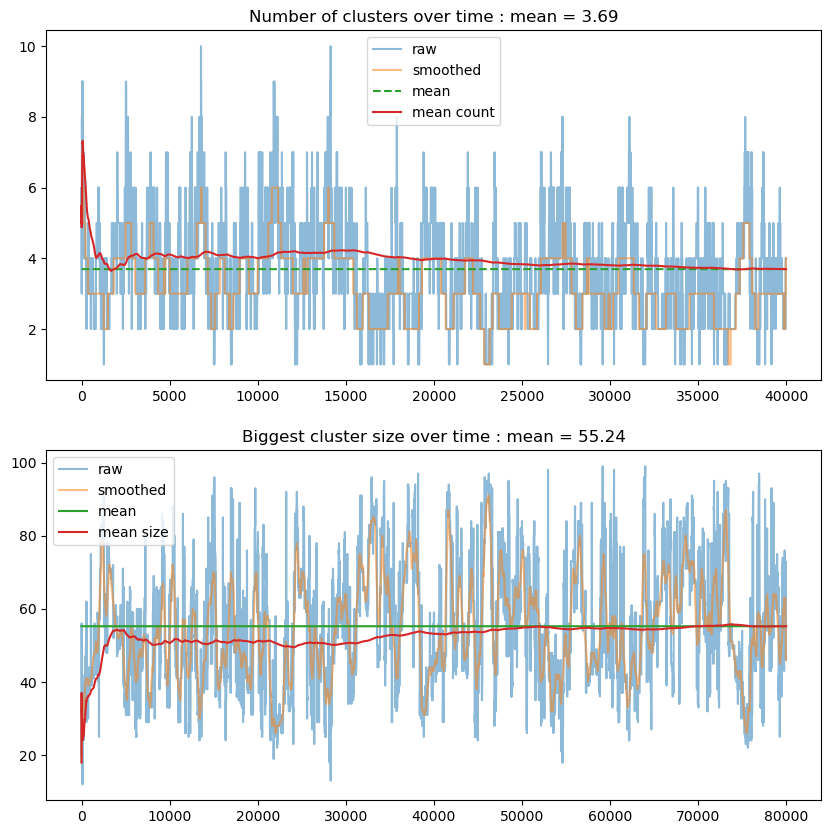

In [197]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# Cluster count
axs[0].plot(cluster_count, label = 'raw', alpha=0.5)
axs[0].plot(cluster_count_lisse, label = 'smoothed', alpha=0.5)
axs[0].plot(np.ones(len(cluster_count))*np.mean(cluster_count), label = 'mean', linestyle='--')
axs[0].plot(mean_count_over_time, label = 'mean count')
axs[0].legend()
axs[0].set_title(f'Number of clusters over time : mean = {np.mean(cluster_count):.2f}')
# Cluster sizes
axs[1].plot(cluster_sizes, label = 'raw', alpha=0.5)
axs[1].plot(cluster_sizes_lisse, label = 'smoothed', alpha=0.5)
axs[1].plot(np.ones(len(cluster_sizes))*np.mean(cluster_sizes), label = 'mean')
axs[1].plot(mean_size_over_time, label = 'mean size')
axs[1].legend()
axs[1].set_title(f'Biggest cluster size over time : mean = {np.mean(cluster_sizes):.2f}')

plt.show()



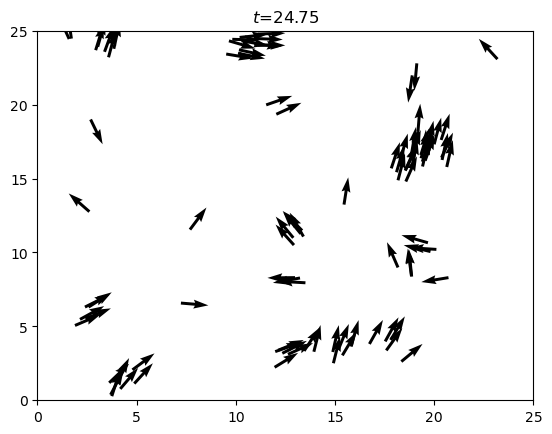

In [185]:
# Visualize the simulation.
# # Initialize the Matplotanimator and feed the simulation data and domain size.
animator = MatplotlibAnimator.MatplotlibAnimator(simulationData, (L, L))
# # Prepare the animator for a 2D representation.
preparedAnimator = animator.prepare(Animator2D.Animator2D())
preparedAnimator.saveAnimation('data/vicsek_test.mp4')

In [186]:
display(Video('data/vicsek_test.mp4', embed=False))

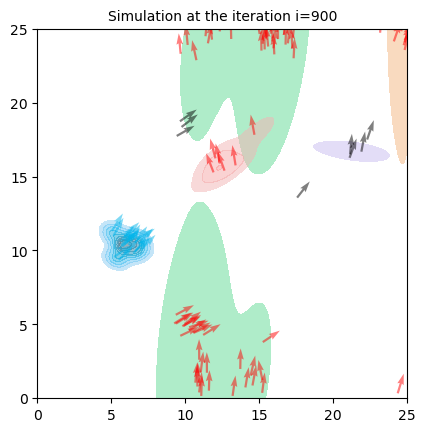

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Simulation at the iteration i=900'}>)

In [187]:
visualisation.plot_clusters(df, 900, labels=df_labels.iloc[900], L=L)

c:\Users\nicos\OneDrive\Bureau\MAIN4\Stage\vicsek_control_theory\utils.py:379: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_all = pd.DataFrame(np.concatenate((pos, angle[:,np.newaxis]), axis=1), columns=['x', 'y', 'angle'])


<AxesSubplot:xlabel='x', ylabel='y'>

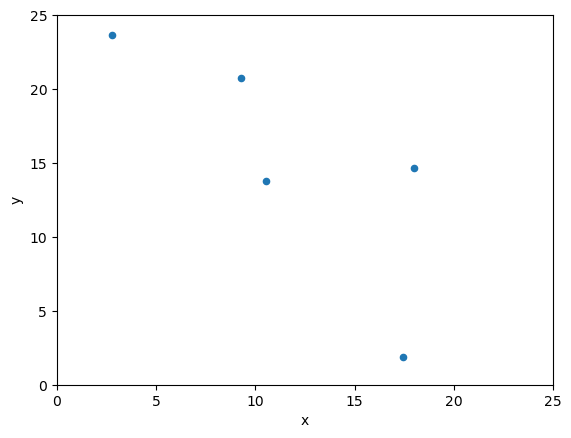

In [188]:
# compute the centroids of the clusters
def compute_centroids(df, labels):
    df['label'] = labels
    df_centroids = df.groupby('label').mean()
    return df_centroids
df_all = utils.get_positions_and_angles(df, 1000)
df_centroids = compute_centroids(df_all, df_labels.iloc[900])
df_centroids.plot(x='x', y='y', kind='scatter', xlim=(0, L), ylim=(0, L))